## Exercise 6

** Question 1:** Consider the integral $I(f):=\int_a^bf(x)dx$. Assume that we want to approximate $I(f)$ by a Newton-Cotes quadrature rule of the form $I_2(f):=\omega_0f(a)+\omega_1f((a+b)/2)+\omega_2f(b)$. Derive the corresponding weights $\omega_0$, $\omega_1$, and $\omega_2$.

**Solution:**
Let $x_0 = a$, $x_1 = \frac{a+b}{2}$, $x_2 = b$.
We have
\begin{eqnarray}
\omega_0 & = & \int_a^b\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}dx\nonumber\\
& = & \int_{-1}^1\frac{t(t-1)}{2}\frac{b-a}{2}dt\nonumber\\
& = & \frac{b-a}{6}.
\end{eqnarray}
We now use the symmetry of Newton-Cotes rules to derive that $\omega_2 = \omega_0 = \frac{b-a}{6}$. Since the sum of all weights must be one we obtain $\omega_1 = \frac{4(b-a)}{6}$.


**Question 2:** Let $x_i$, $i=0,\dots,N+1$ be distinct interpolation points and $y_i$ be associated function values. Let $q$ be the interpolation polynomial associated with the points $x_j$, $j=0,\dots,N$ and $r$ the interpolation polynomial associated with the points
$x_\ell$, $\ell=1,\dots, N+1$. Show that
$$
p(x) = \frac{(x-x_0)r(x)-(x-x_{N+1})q(x)}{x_{N+1}-x_0}
$$
is the Lagrange interpolation polynomial for the points $x_i$, $i=0,\dots,N+1$.

**Solution:** For $x_j$, $j=1,\dots,N$ we have $r(x_j)=q(x_j)$ and hence, $p(x_j) = y_j$. Furthermore,
$p(x_0) = q(x_0) = y_0$, and $p(x_{N+1}) =r(x_{N+1}) = y_{N+1}$. Hence, $p$ is the unique interpolation polynomial at all interpolation points $x_j$, $j=0,\dots,N+1$.

**Question 3:** The following code plots the error of polynomial interpolation.

Text(0.5, 0, 'n')

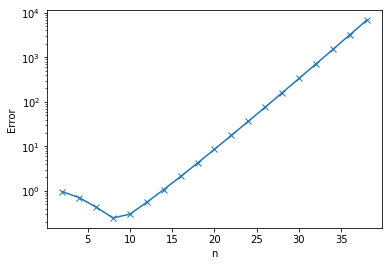

In [2]:
%matplotlib inline

from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

nn= range(2,40,2) # List with numbers of interpolation points
m=1000 # Number of points at which to evaluate the interpolation pol.
error = [] # This will store the error
fun = lambda x: 1/(1+25*x**2) # The function to interpolate 


for n in nn:
    x=np.linspace(-1,1,n) # Interpolation points
    y=fun(x)
    xeval=np.linspace(-1,1,m) # Evaluation points
    y_interpolated=barycentric_interpolate(x,y,xeval)
    yexact=fun(xeval) # Exact function
    error.append(np.max(np.abs(yexact-y_interpolated))) # Maximum error in the interval
    

plt.semilogy(nn,error,'-x')
plt.ylabel("Error")
plt.xlabel("n")

Try the above code for the following functions: 

* $f(x) = sin(\pi x)$
* $f(x) = |x|$
* $f(x) = |x|\cdot x$

Now replace the equispaced points in the above code with Chebychev points. These are defined by

$$
x_k = \cos(\frac{k}{n}\pi),~k=0,\dots,N.
$$
Chebychev points cluster at the boundary and in the lecture we have said that they solve the Runge phenomenon. You should confirm this using the following functions:

* $ f(x) = 1/(1+25x^2)$
* $ f(x) = |x| $
* $ f(x) = |x|\cdot x$

How does the rate of convergence of the error depend on the smoothness of the function?


Text(0.5, 1.0, 'Interpolation in Chebychev points')

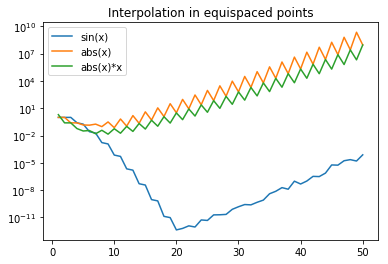

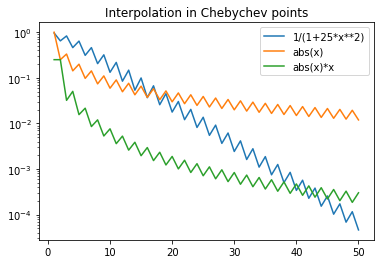

In [4]:
%matplotlib inline

from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

def compute_interpolation_error(n, fun, eval_points, mode='equispaced'):
    """
    Return the interpolation errror for a given number of n interpolation points.
    
    The function is defined via the callable fun. The evaluation points are stored
    in eval_points. The mode is allowed to be 'equispaced' or 'chebychev'.
    
    """
    
    
    if mode == 'equispaced':
        x = np.linspace(-1,1,n)
    elif mode == 'chebychev':
        k = np.arange(0,n+1)
        x = np.cos((k/n)*np.pi)
    else:
        raise ValueError("Unknown mode")
    
    y_interpolated = barycentric_interpolate(x,fun(x),eval_points)
    y_exact = fun(eval_points)
    
    error = np.max(np.abs(y_interpolated-y_exact))
    return error

sin_fun = [lambda x: np.sin(np.pi*x),'sin(x)']
abs_fun = [lambda x: np.abs(x), 'abs(x)']
abs_times_x_fun = [lambda x: np.abs(x)*x, 'abs(x)*x']
runge_fun = [lambda x: 1/(1+25*x**2), '1/(1+25*x**2)']

equispaced_points_funs = [sin_fun, abs_fun, abs_times_x_fun]
chebychev_funs = [runge_fun,abs_fun,abs_times_x_fun]

equispaced_points_errors = [[],[],[]]
chebychev_errors = [[],[],[]]


eval_points = np.linspace(-1,1,1000)
nn = range(1,51)

for i in range(3):
    for n in nn:
        equispaced_points_errors[i].append(compute_interpolation_error(n,equispaced_points_funs[i][0],eval_points,'equispaced'))
        chebychev_errors[i].append(compute_interpolation_error(n,chebychev_funs[i][0],eval_points,'chebychev'))
        
plt.figure()
for i in range(3):
    plt.semilogy(nn,equispaced_points_errors[i],label=equispaced_points_funs[i][1])
plt.legend()
plt.title('Interpolation in equispaced points')

    
plt.figure()
for i in range(3):
    plt.semilogy(nn,chebychev_errors[i],label=chebychev_funs[i][1])
plt.legend()
plt.title('Interpolation in Chebychev points')